<a href="https://colab.research.google.com/github/oonya/image-processing/blob/master/Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

contours 1
mean [119.98999204 142.93977774  21.21673511]
mean [202.74219106 196.0137654   65.02198131]
mean [131.46528927  51.82792707  50.51001816]
mean [200.67022745 192.31305097 116.46014663]
mean [150.32028327  97.98353335  91.77994378]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

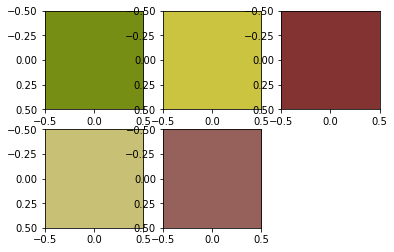

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# RGBの画像をマスキングして返す
def masking(img):

  hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
  s = hsv[:, :, 1]

  plt.gray()
  s[s < 30] = 255
  s[(s > 30) & (s != 255)] = 0

  kernel = np.ones((10, 10), np.uint8)
  mor = cv2.morphologyEx(s, cv2.MORPH_CLOSE, kernel)
  mor = ~mor

  contours, hierarchy = cv2.findContours(mor, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  print("contours",len(contours))

  mask = np.zeros_like(img)
  cv2.drawContours(mask, contours, -1, (255, 255, 255), -1)
  mask = mask & img
  return mask

img1 = cv2.imread('drive/My Drive/latest1.JPG')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# img2 = cv2.imread('drive/My Drive/latest2.JPG')
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# img3 = cv2.imread('drive/My Drive/latest3.JPG')
# img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
# img4 = cv2.imread('drive/My Drive/latest4.JPG')
# img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
mask1 = masking(img1)
# mask2 = masking(img2)
# mask3 = masking(img3)
# mask4 = masking(img4)


# Kmeans start
data = np.reshape(mask1, (mask1.shape[0]*mask1.shape[1], mask1.shape[2])) # クラスタリングのために2次元に直す

data = data[(data != 0).all(axis=1)]

n_clusters=5 # クラスタ数(何色に減色するか)
model = KMeans(n_clusters=n_clusters, random_state=10).fit(data)
labels = model.labels_

plt.figure(2)
data = data[:,0:3]

fig = plt.figure()

for l in range(0,n_clusters):
    mean = np.mean(data[labels==l,:], axis=0)
    data[labels==l,:]=mean
    print("mean", mean)
    ax = fig.add_subplot(2, 3, l+1)
    ax.imshow(np.uint8([[mean]]))

# Kmemans end

# plt.imshow(mask)

# fig = plt.figure(figsize=(8, 8))
# fig.suptitle('Binarization by Saturation', fontsize=25)
# ax = fig.add_subplot(2, 2, 1)
# ax.set_title('latest1')
# ax.imshow(mask1)
# ax = fig.add_subplot(2, 2, 2)
# ax.set_title('latest2')
# ax.imshow(mask2)
# ax = fig.add_subplot(2, 2, 3)
# ax.set_title('latest3')
# ax.imshow(mask3)
# ax = fig.add_subplot(2, 2, 4)
# ax.set_title('latest4')
# ax.imshow(mask4)


# print(len(contours))

# find RETR_EXTERNAL(一番外側)

In [ ]:
print(np.array([0, 0, 0]*3))

[0 0 0 0 0 0 0 0 0]
